In [100]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from scipy.stats import linregress

In [102]:
df = pd.read_csv("tips_dataset.csv")

# Display few rows of the dataset
print(df.head())

# Convert categorical variables to numeric
# Initialize LabelEncoder

label_encoder = LabelEncoder()
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['smoker'] = df['smoker'].map({'Yes': 1, 'No': 0})
df['day'] = label_encoder.fit_transform(df['day'])
df['time'] = label_encoder.fit_transform(df['time'])

# Check for missing values
print(df.isnull().sum())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


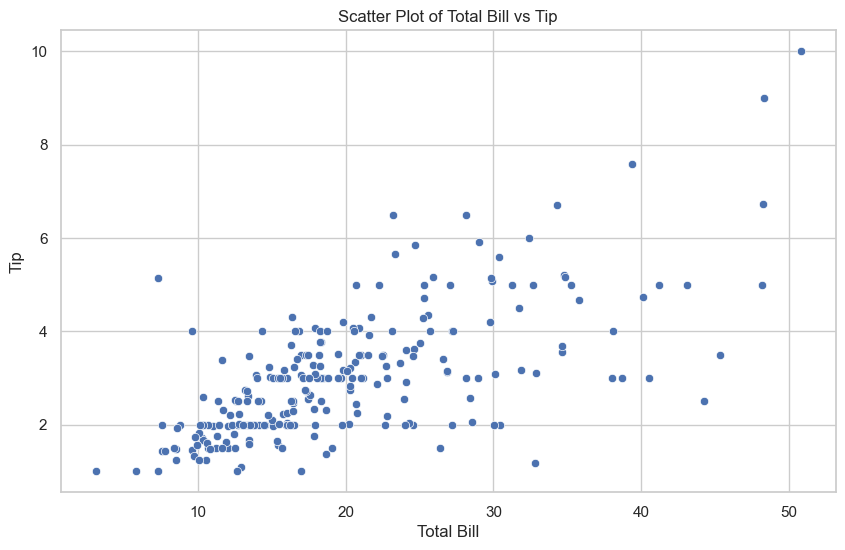

In [104]:
# Scatter Plot for total_bill vs tip
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title("Scatter Plot of Total Bill vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

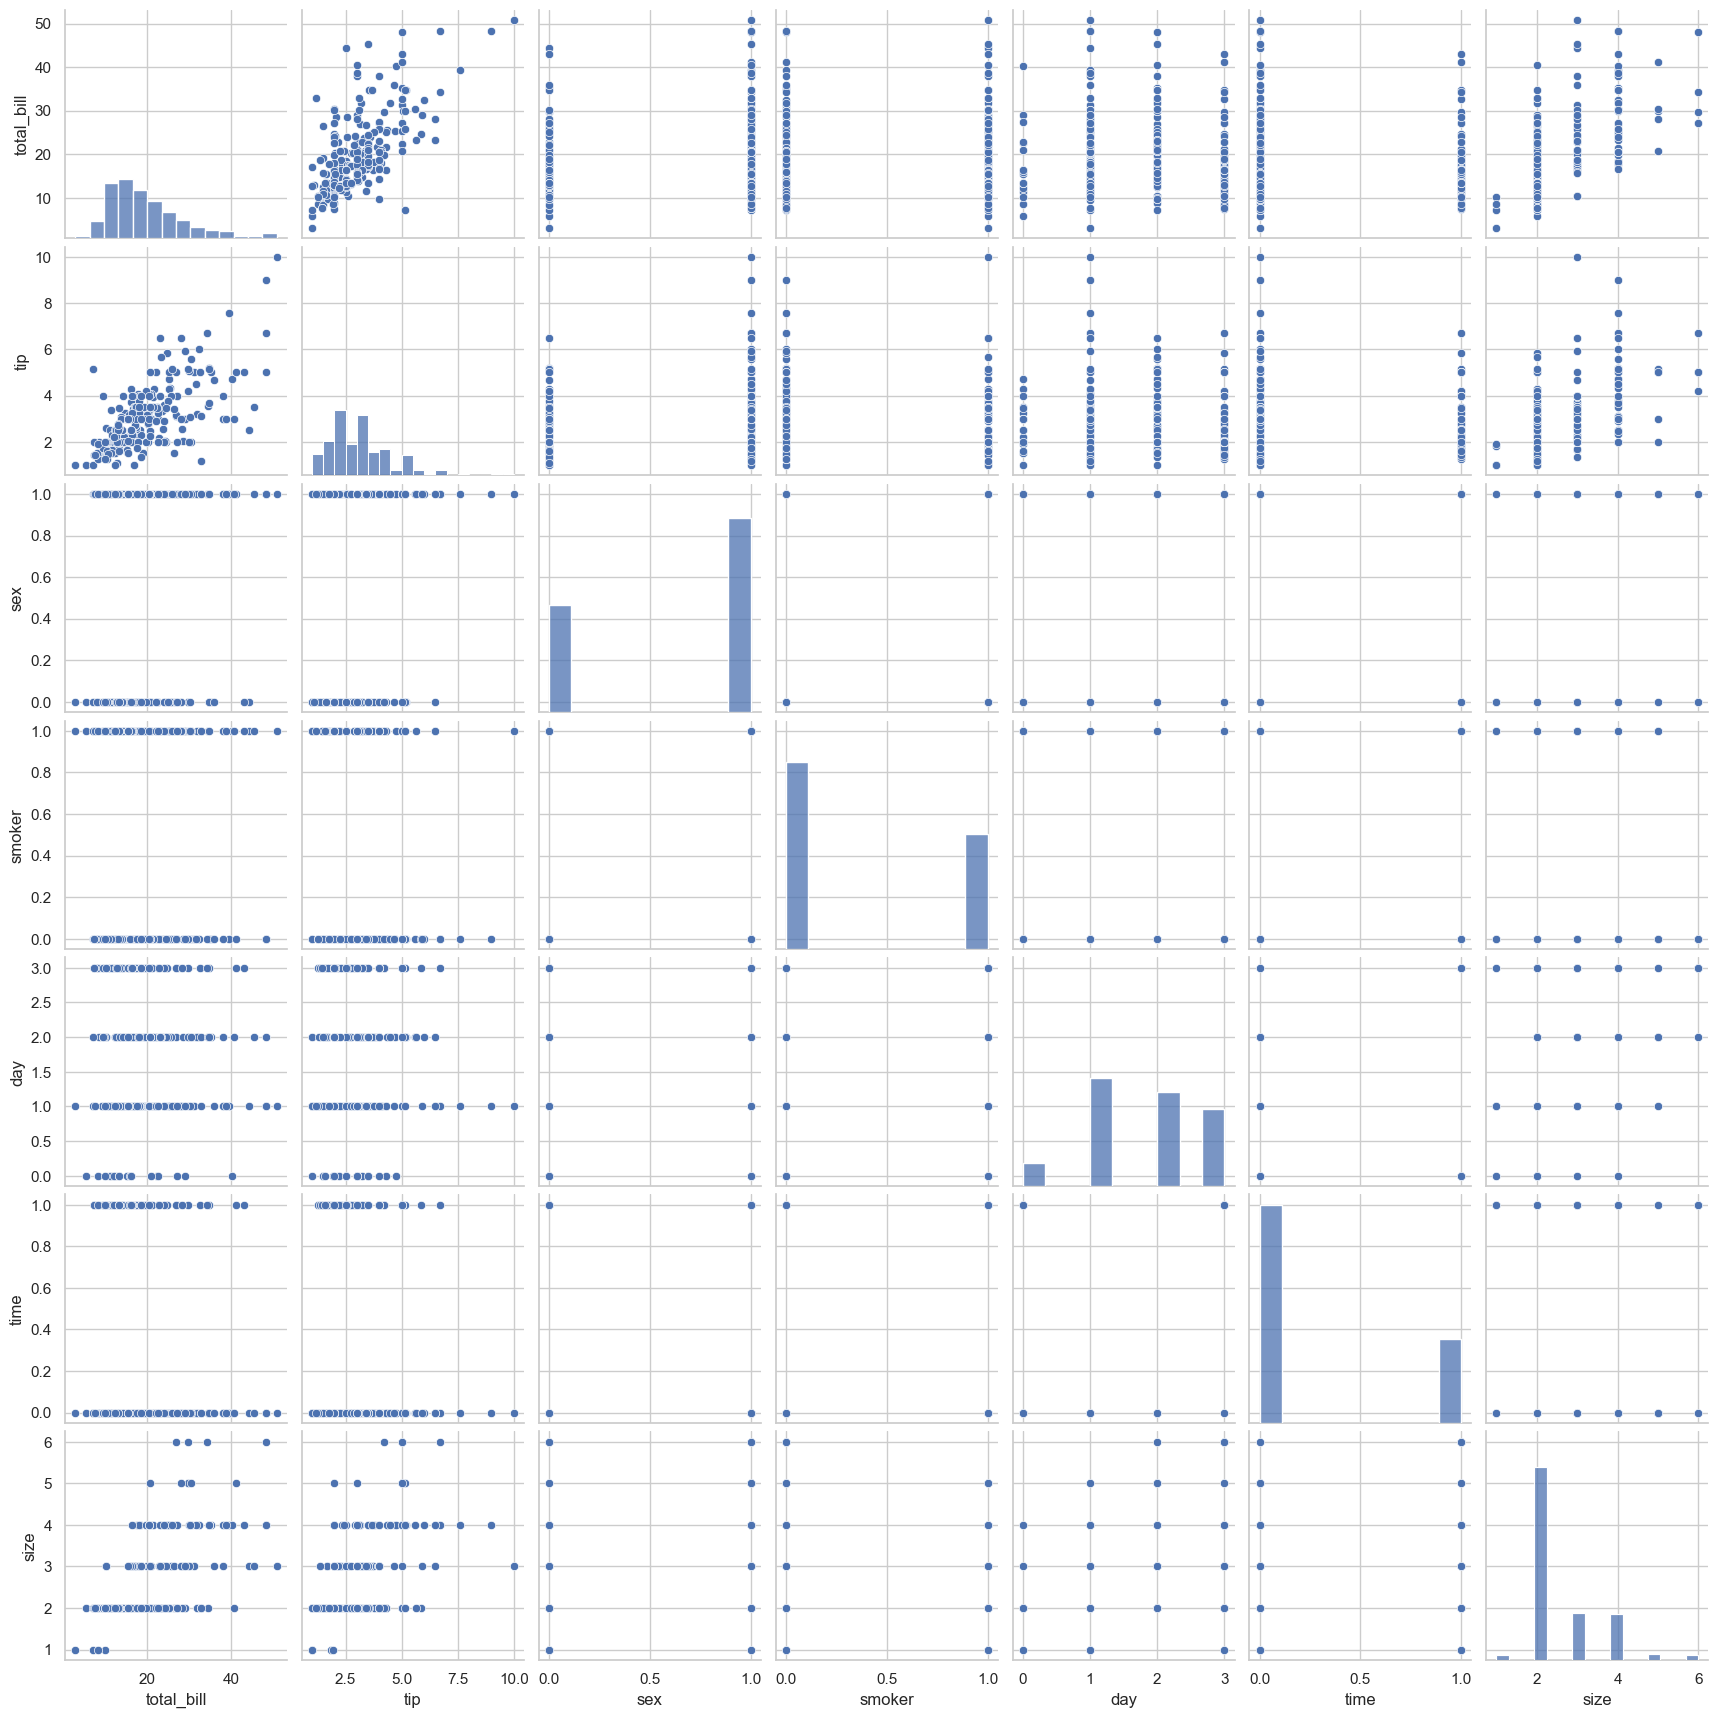

In [106]:
# Pairplot for multiple features
sns.pairplot(df)
plt.show()


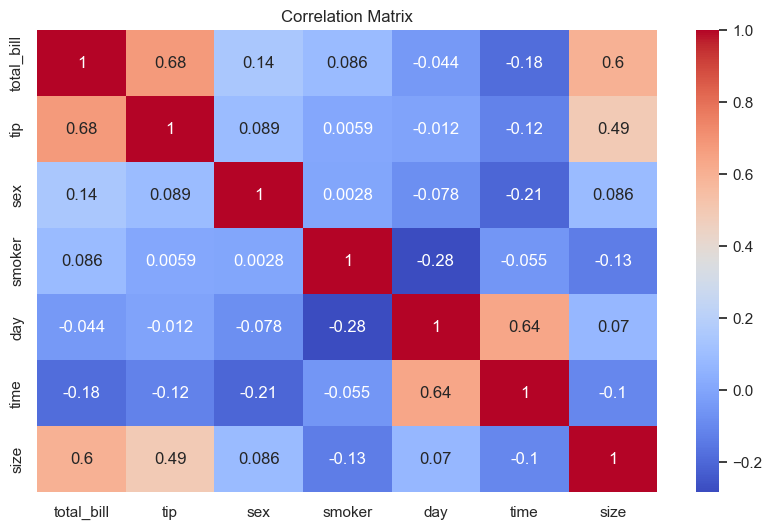

In [107]:
# Correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [108]:
# Split the dataset into training and testing sets
X = df.drop('tip', axis=1)
y = df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/var/folders/4r/m5bzx90s1v309yhlt81c96_r0000gn/T/ipykernel_70355/8588882.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame({"Model": [name], "MAE": [mae], "MSE": [mse], "R^2": [r2]})], ignore_index=True)
/var/folders/4r/m5bzx90s1v309yhlt81c96_r0000gn/T/ipykernel_70355/8588882.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")
/var/folders/4r/m5bzx90s1v309yhlt81c96_r0000gn/T/ipykernel_70355/8588882.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


                            Model       MAE       MSE       R^2
0               Linear Regression  0.670381  0.694813  0.444137
1                Ridge Regression  0.669679  0.692749  0.445788
2                Lasso Regression  0.637484  0.590853  0.527307
3        Decision Tree Regression  0.938571  1.421304 -0.137069
4        Random Forest Regression  0.774543  0.962519  0.229967
5       Support Vector Regression  0.570710  0.538322  0.569333
6  K-Nearest Neighbors Regression  0.726245  0.838227  0.329403


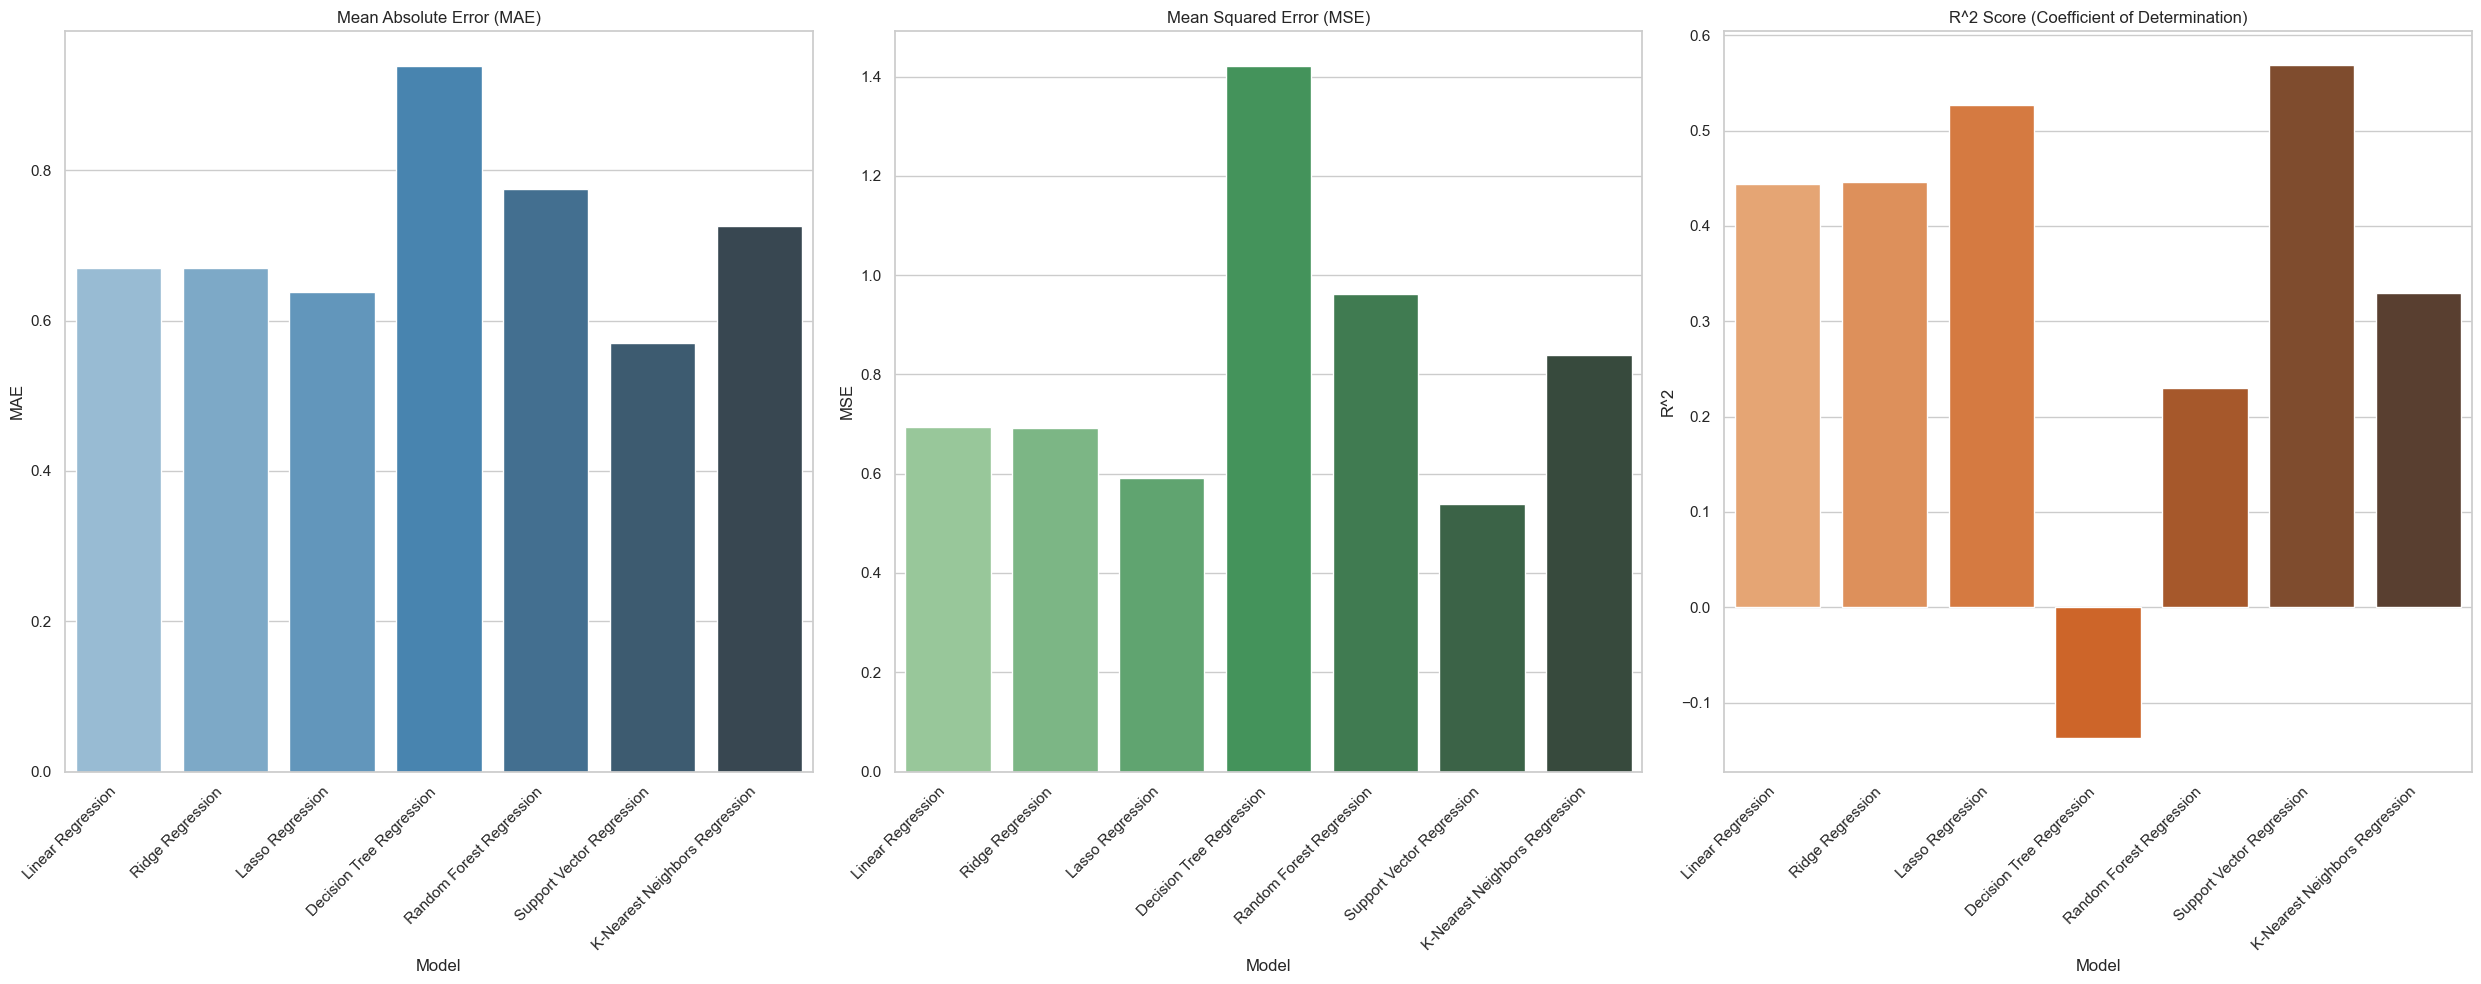

In [109]:
# Initialize the regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors Regression": KNeighborsRegressor()
}

# Create a DataFrame to hold performance metrics
results_df = pd.DataFrame(columns=["Model", "MAE", "MSE", "R^2"])

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append results to the DataFrame
    results_df = pd.concat([results_df, pd.DataFrame({"Model": [name], "MAE": [mae], "MSE": [mse], "R^2": [r2]})], ignore_index=True)

# Print performance metrics for each model
print(results_df)

# Set up the style for the plots
sns.set(style="whitegrid")

# Plot MAE, MSE, and R^2 scores for each model
fig, axes = plt.subplots(1, 3, figsize=(25, 10))

# Plot Mean Absolute Error (MAE)
sns.barplot(x="Model", y="MAE", data=results_df, ax=axes[0], palette="Blues_d", hue="Model")
axes[0].set_title("Mean Absolute Error (MAE)")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")

# Plot Mean Squared Error (MSE)
sns.barplot(x="Model", y="MSE", data=results_df, ax=axes[1], palette="Greens_d", hue="Model")
axes[1].set_title("Mean Squared Error (MSE)")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")

# Plot R^2 Score
sns.barplot(x="Model", y="R^2", data=results_df, ax=axes[2], palette="Oranges_d", hue="Model")
axes[2].set_title("R^2 Score (Coefficient of Determination)")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha="right")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

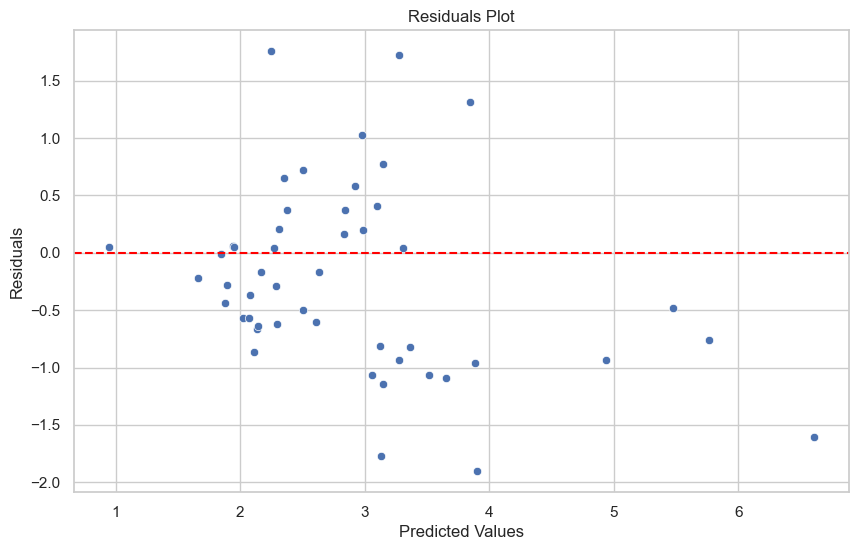

In [110]:
# taking liner regression model to plot residuals

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

residuals = y_test - y_pred

# Residuals plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [116]:
# Feature importance (for tree-based models)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

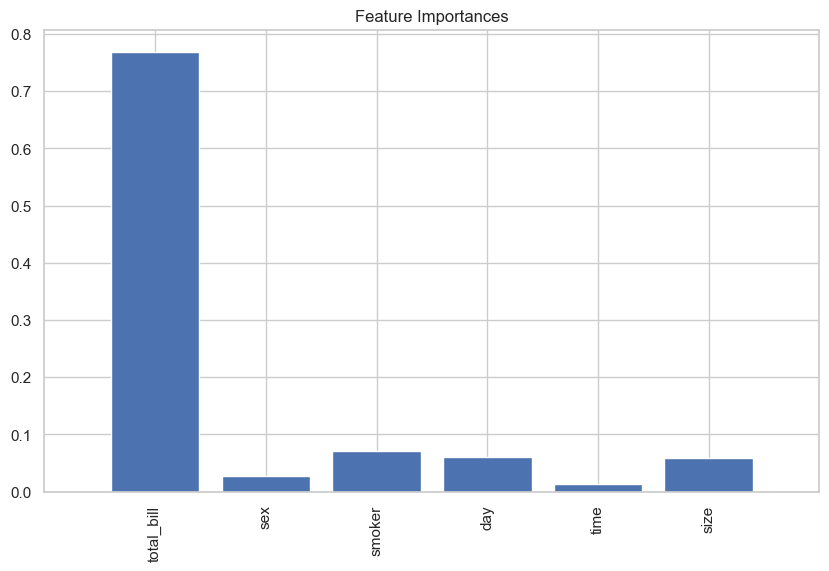

In [118]:
# Plot feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances, align="center")
plt.xticks(range(X_train.shape[1]), X.columns, rotation=90)  
plt.xlim([-1, X_train.shape[1]])
plt.show()

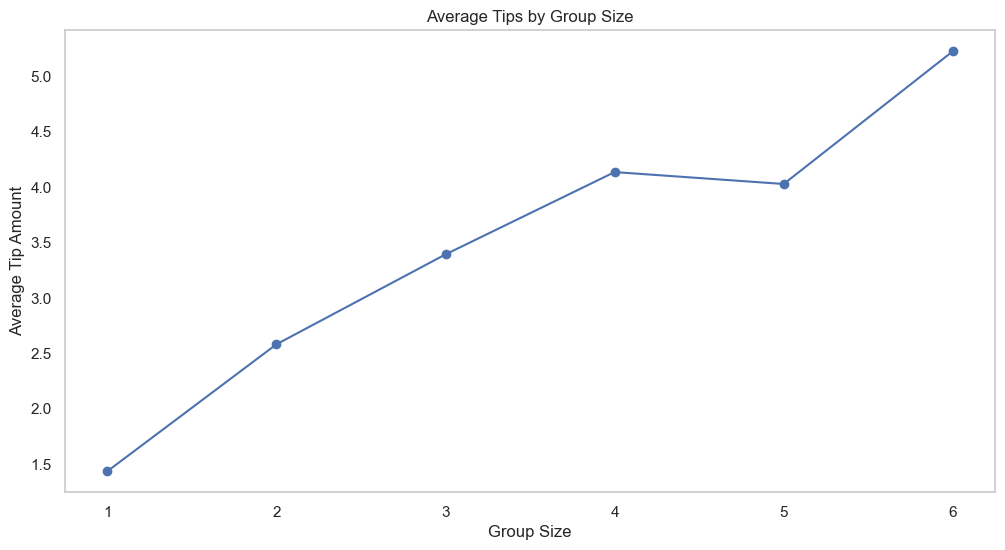

In [122]:
# Liner plot for Average tips by group size
average_tips_by_size = df.groupby('size')['tip'].mean()

plt.figure(figsize=(12, 6))
average_tips_by_size.plot(kind='line', marker='o')
plt.title('Average Tips by Group Size')
plt.xlabel('Group Size')
plt.ylabel('Average Tip Amount')
plt.xticks(average_tips_by_size.index)
plt.grid()
plt.show()

In [124]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

# Add a constant to the model (intercept)
X = sm.add_constant(X)  

# Fit the linear regression model
model = sm.OLS(y, X).fit() # X is features and y is target variable

# Perform Rainbow test for linearity using the fitted model
statistic, p_value = linear_rainbow(model)
print(f'Rainbow Test Statistic: {statistic}, p-value: {p_value}')

Rainbow Test Statistic: 1.2036274510126592, p-value: 0.15798464222013225


# Some Insights from this data analysis:
## The Total bill amount significantly impacts the tip amount.
## People tend to tip more during dinner.
## The tip amount is proportional to group size.
## Males tend to give more tips.
## Tipping amount is usually high on saturday.
## Usually smokers tend to tip less than non-smokers. 